In [18]:

def getscore(bed,indexadjust):
    bed = list(bed)
    indices =list(range(indexadjust,indexadjust+len(bed))) 
    #print (indexadjust)

    #print([indices[i]*int(aa) for i,aa in enumerate(bed)])

    return sum([indices[i]*int(aa) for i,aa in enumerate(bed)])  


In [25]:
startbed = "10000000010101000111001110011101001000011101110101000111100110011011111001100010100000100011101011110000000000000000000000000000000000000000"
#startbed = "11001100011000001100011000001100110001100011000110011000110001100110011001100011001100011001100110001100110001100110011001100011001100110001100110011000110001100011000110001100110011"
transform = [(0b10011,0),(0b11001,1),(0b00110,0),(0b01101,1),(0b00000,0),(0b00111,1),(0b11101,1),(0b10000,0),(0b10110,1),(0b01011,1),(0b10001,0),(0b00011,0),(0b11100,1),(0b01001,0),(0b11110,0),(0b00001,0),(0b11111,1),(0b01110,0),(0b10010,0),(0b11000,1),(0b01000,1),(0b10101,0),(0b00100,1),(0b00010,1),(0b11010,0),(0b01100,1),(0b01010,0),(0b10100,0),(0b00101,1),(0b10111,0),(0b11011,0),(0b01111,1)]

#startbed ="1001010011000000111000111"
#transform = [( 0b00011,1),( 0b00100,1),( 0b01000,1),( 0b01010,1),( 0b01011,1),( 0b01100,1),( 0b01111,1),( 0b10101,1),( 0b10111,1),( 0b11010,1),( 0b11011,1),( 0b11100,1),( 0b11101,1),( 0b11110,1)]


transform_dict = {}
for x in transform:
    transform_dict[x[0]]=str(x[1])
    #print (x)
for x in range (32):
    if x not in transform_dict:
        transform_dict[x]='0'
        print ('TRANSFORMED')


#grow(50000000001,startbed)
#grow(21,startbed)

def getlength (result):
    truefirst = result.find('1')
    truelast = result.rfind('1')

    truelen = truelast-truefirst
    return truelen

def recordscores (result,indexadjust):
    truefirst = result.find('1')
    truelast = result.rfind('1')
    trueindexadjust = indexadjust + truefirst
    trueindexdelta = truefirst - indexadjust
    truelen = truelast-truefirst
    #print ('correct',getscore(result,indexadjust)) #correct
    #print ('deepdive len',len(result),'indexadjust', indexadjust)
    print ('attempt',getscore(result[result.find('1'):result.rfind('1')+1],trueindexadjust))
    #print ('deepdive','truefirst/last',truefirst,truelast,'truelen',truelen,'attemtlen')
    print ('without indexadjust',getscore(result[result.find('1'):result.rfind('1')+1],0))
    truescores.append(getscore(result[result.find('1'):result.rfind('1')+1],0))
    trueindexdeltalist.append(trueindexdelta)
    return

runs = []
lengths = []
truescores = []
trueindexdeltalist = []
indexdeltas=[]


def fastforward(startbed):
    trails = 50000
    indexadjust = 0
    scores=[]
    for r in range(1,1220):
        runs.append(r)
        if r%10000 == 0:
            print(r,len(startbed),startbed)
        #print (startbed)
        if startbed[0:10] == '0000000000':
            startbed = startbed[5:]
            indexadjust +=5
    
        if startbed[-11:-1]=='0000000000':
            startbed = startbed[:-5]
        
        if startbed[0:2] != '00':
            startbed = '00000'+startbed
            indexadjust +=-5
        if startbed[-3:-1]!='00':
            startbed = startbed+'00000'

           
            

        result = '00' 
        
        plantenbed= len(startbed)-2
        for x in range(2,plantenbed):
            result += (transform_dict[int(startbed[x-2:x+3],2)])
        result += '00'
        print ('run',r)
        print (result)

        recordscores(result, indexadjust)
        scores.append(getscore(result,indexadjust))
        lengths.append(getlength(result))
        indexdeltas.append(indexadjust)
        
        startbed = result

%load_ext line_profiler
fastforward(startbed)   


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
run 1
00001110000001100001001011010110101000011000101000100001001101100110010011011001101100100011100101001010110000000000000000000000000000000000
attempt 2355
without indexadjust 2400
run 2
000010110000001100110011110011100001000011011001011100110001011100110100010111001011101100101101000010011110000000000000000000000000000
attempt 2656
without indexadjust 2707
run 3
0001111110000001100110110110101100111000010111011001100110111001100100101110011011001011101111001001100110110000000000000000000000
attempt 2982
without indexadjust 3100
run 4
00011110110000001100101101100111101011001110010111001100100011001101001100110010111011001001011010001100101110000000000000000
attempt 2791
without indexadjust 2903
run 5
000110101110000001101111011101101001111010110110011001101100011001000001100110110010111010011110010001101100110000000000
attempt 2881
without indexadjust 2997
run 6
0000100100110000001001010

In [20]:
9920%5

0

In [21]:
50000000000%5

0

In [47]:
50000000000-9920

49999990080

In [48]:
10101+49999990080

50000000181

In [ ]:
trueindex = 50000000181

In [ ]:
2400000010909 too low 
4000000022546 too high geprobeerd op 9920
4000000021906 too high
4000000000866

In [11]:
(getscore('11001100011000001100011000001100110001100011000110011000110001100110011001100011001100011001100110001100110001100110011001100011001100110001100110011000110001100011000110001100110011',50000000181))

4000000021906

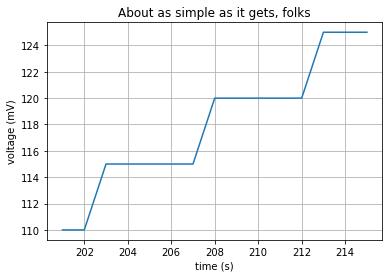

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
y = indexdeltas[200:215]
x = runs[200:215]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [28]:
import IPython; IPython.__version__

'5.3.0'

In [31]:
202-120

82

In [32]:
a =50000000000-82

In [33]:
getscorea

49999999918

In [35]:
startbed = "11001100011000001100011000001100110001100011000110011000110001100110011001100011001100011001100110001100110001100110011001100011001100110001100110011000110001100011000110001100110011"
getscore(startbed,a)

4000000000866

dit was ht juiste antwoord. komt erop neer dat er al heel snel één sequence ontstaat die gewoon gaat lopen. Alleen door datm
gekloot met die nullen zie je met je indexadjust te klooien en daardoor zie je het niet goed meer.

beter was geweest om de positie van de eerste 1 te bepalen